In [227]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [228]:
variables_to_use = [
                    'jmuon_E',                      # particle energy reconstructed using Jmuon algoritm
                    'jmuon_t',                      # time
                    'jmuon_likelihood',             # likelihood of track reconstruction fit
                    'jmuon_pos_x',                  # particle position, coordinates x, y, z
                    'jmuon_pos_y', 
                    'jmuon_pos_z',
                    'jmuon_dir_x',                  # particle direction, coordinates x, y, z
                    'jmuon_dir_y', 
                    'jmuon_dir_z',
                    'jmuon_JGANDALF_BETA0_RAD',     # parameters from fit
                    'jmuon_JGANDALF_BETA1_RAD', 
                    'jmuon_JGANDALF_CHI2',          # chi2 from reconstructed energy fit
                    'jmuon_JSHOWERFIT_ENERGY',      # shower energy from AANET toolkit
                    'class'                         # identifies type of particle, 0 means neutrino and 1 means muon
                    ]

In [229]:
df_neutrino_classA = pd.read_hdf("data/atm_neutrino_classA.h5", "y")
df_neutrino_classB = pd.read_hdf("data/atm_neutrino_classB.h5", "y")
df_neutrino_classC = pd.read_hdf("data/atm_neutrino_classC.h5", "y")
df_neutrino_classD = pd.read_hdf("data/atm_neutrino_classD.h5", "y")
df_neutrino_classE = pd.read_hdf("data/atm_neutrino_classE.h5", "y")
df_neutrino_classF = pd.read_hdf("data/atm_neutrino_classF.h5", "y")
df_neutrino_classG = pd.read_hdf("data/atm_neutrino_classG.h5", "y")
df_neutrino_classH = pd.read_hdf("data/atm_neutrino_classH.h5", "y")
df_muon = pd.read_hdf("data/atm_muon.h5", "y")

In [230]:
df_neutrino_classA.head()

,jmuon_E,jmuon_t,jmuon_likelihood,jmuon_JENERGY_ENERGY,jmuon_JENERGY_CHI2,jmuon_JENERGY_NDF,jmuon_pos_x,jmuon_pos_y,jmuon_pos_z,jmuon_dir_x,...,jmuon_JGANDALF_BETA0_RAD,jmuon_JGANDALF_BETA1_RAD,jmuon_JGANDALF_CHI2,jmuon_JGANDALF_NUMBER_OF_HITS,jmuon_JSHOWERFIT_ENERGY,jmuon_AASHOWERFIT_ENERGY,energy,dir_x,dir_y,dir_z
0,1.891714,4.474846e+07,37.634625,1.891714,74.615097,3020.0,453.226938,532.865944,61.800646,-0.515677,...,0.181235,0.118286,-37.634624,18.0,1.891714,0.181235,3.396949,-0.330453,0.929098,-0.166064
1,2.632753,3.481925e+07,34.155696,2.632753,47.734573,2591.0,451.106344,567.127781,197.027487,0.491532,...,0.074849,0.037712,-34.155697,16.0,2.632753,0.074849,5.843722,0.946442,0.217871,-0.238286
2,2.128752,8.449993e+07,103.809244,2.128752,117.278687,3297.0,464.571627,575.392003,101.768708,0.309452,...,0.032102,0.022654,-103.809242,41.0,2.128752,0.032102,2.901115,0.114273,-0.873835,0.472603
3,0.000321,5.162782e+07,29.352586,0.000321,86.250267,2454.0,452.348943,553.737762,114.070514,-0.236575,...,0.082047,0.043813,-29.352587,19.0,0.000321,0.082047,2.334646,0.114464,0.047676,0.992283
4,2.214190,1.440745e+06,39.449728,2.214190,74.018600,2831.0,506.816452,577.954764,32.727291,-0.677947,...,0.045680,0.031601,-39.449726,15.0,2.214190,0.045680,3.850780,-0.626521,-0.772913,-0.100380


In [231]:
df_muon.head()

,jmuon_E,jmuon_t,jmuon_likelihood,jmuon_JENERGY_ENERGY,jmuon_JENERGY_CHI2,jmuon_JENERGY_NDF,jmuon_pos_x,jmuon_pos_y,jmuon_pos_z,jmuon_dir_x,...,jmuon_JGANDALF_BETA0_RAD,jmuon_JGANDALF_BETA1_RAD,jmuon_JGANDALF_CHI2,jmuon_JGANDALF_NUMBER_OF_HITS,jmuon_JSHOWERFIT_ENERGY,jmuon_AASHOWERFIT_ENERGY,energy,dir_x,dir_y,dir_z
0,37.055072,5.978078e+07,215.506733,37.055073,315.141754,4635.0,475.466621,600.683540,193.490153,-0.377207,...,0.002520,0.001765,-215.506729,129.0,37.055073,0.002520,255.074204,-0.382795,-0.166324,-0.908738
1,24.035844,2.135497e+07,136.847122,24.035845,191.098129,4739.0,402.998189,566.898304,179.858115,0.401950,...,0.004739,0.003257,-136.847122,68.0,24.035845,0.004739,189.056483,0.367640,-0.380670,-0.848488
2,22.042544,5.951806e+07,256.413133,22.042543,264.516998,4060.0,485.599116,576.161763,194.443615,-0.535178,...,0.002973,0.002102,-256.413147,139.0,22.042543,0.002973,766.328283,-0.533977,-0.441161,-0.721280
3,7.923659,6.273663e+07,58.752511,7.923659,113.538155,3205.0,445.574975,567.346934,209.325342,0.462717,...,0.017001,0.011848,-58.752510,39.0,7.923659,0.017001,155.103547,0.134677,0.669082,-0.730884
4,29.726552,3.320379e+07,139.926516,29.726551,191.795242,3200.0,377.477528,573.664868,103.134306,0.698212,...,0.003499,0.002318,-139.926514,72.0,29.726551,0.003499,507.097460,0.692788,-0.221264,-0.686358


In [232]:
# class=0 ---> neutrino 
# class=1 ---> muon
df_neutrino_classA["class"] = 0
df_neutrino_classB["class"] = 0
df_neutrino_classC["class"] = 0
df_neutrino_classD["class"] = 0
df_neutrino_classE["class"] = 0
df_neutrino_classF["class"] = 0
df_neutrino_classG["class"] = 0
df_neutrino_classH["class"] = 0
df_muon["class"] = 1

In [233]:
data = pd.concat([df_neutrino_classA, df_neutrino_classB, df_neutrino_classC, df_neutrino_classD, df_neutrino_classE, df_neutrino_classF, df_neutrino_classG, df_neutrino_classH, df_muon])[variables_to_use]
X = data.drop("class", axis=1)
y = data["class"]

In [234]:
data

,jmuon_E,jmuon_t,jmuon_likelihood,jmuon_pos_x,jmuon_pos_y,jmuon_pos_z,jmuon_dir_x,jmuon_dir_y,jmuon_dir_z,jmuon_JGANDALF_BETA0_RAD,jmuon_JGANDALF_BETA1_RAD,jmuon_JGANDALF_CHI2,jmuon_JSHOWERFIT_ENERGY,class
0,1.891714,4.474846e+07,37.634625,453.226938,532.865944,61.800646,-0.515677,0.833744,-0.197355,0.181235,0.118286,-37.634624,1.891714,0
1,2.632753,3.481925e+07,34.155696,451.106344,567.127781,197.027487,0.491532,-0.712937,-0.500117,0.074849,0.037712,-34.155697,2.632753,0
2,2.128752,8.449993e+07,103.809244,464.571627,575.392003,101.768708,0.309452,-0.868037,0.388266,0.032102,0.022654,-103.809242,2.128752,0
3,0.000321,5.162782e+07,29.352586,452.348943,553.737762,114.070514,-0.236575,0.066739,0.969318,0.082047,0.043813,-29.352587,0.000321,0
4,2.214190,1.440745e+06,39.449728,506.816452,577.954764,32.727291,-0.677947,-0.700874,0.221726,0.045680,0.031601,-39.449726,2.214190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585381,9.274386,9.767001e+07,137.568548,502.827371,538.810543,44.028422,-0.428949,0.702042,-0.568454,0.012521,0.007581,-137.568542,9.274385,1
585382,14.074647,3.393858e+07,70.946376,441.069251,615.689924,179.328613,0.049230,-0.665623,-0.744662,0.009111,0.005859,-70.946373,14.074647,1
585383,31.658350,7.110746e+07,256.674523,521.467366,574.320565,117.456391,-0.691694,-0.049210,-0.720512,0.001494,0.000901,-256.674530,31.658350,1
585384,6.457413,9.826733e+07,59.541255,454.197852,552.066999,206.156879,0.692991,-0.228603,-0.683742,0.008935,0.005990,-59.541256,6.457414,1


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [236]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_features=4,
    verbose=0
)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [237]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Precision: 0.9924304615889803
Recall: 0.9982573833414959
Accuracy: 0.9908719686657963


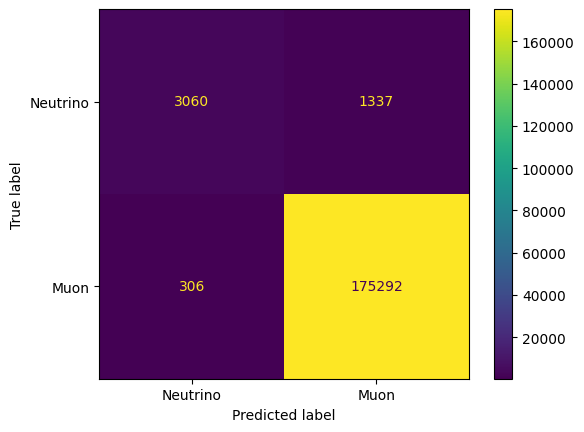

In [238]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Neutrino", "Muon"]).plot()

PRECYZJA --- Jak wiele spośród przewidywanych klas okazało się nimi

CZUŁOŚĆ --- Jak wiele spośród rzeczywistych klas zostało dobrze zakwalifikowanych

In [239]:
predicted_neutrino_true_neutrino, predicted_muon_true_neutrino, predicted_neutrino_true_muon, predicted_muon_true_muon = cm.ravel()

print("Precision for neutrino:", predicted_neutrino_true_neutrino / (predicted_neutrino_true_neutrino + predicted_neutrino_true_muon))
print("Recall for neutrino:", predicted_neutrino_true_neutrino / (predicted_neutrino_true_neutrino + predicted_muon_true_neutrino))
print()
print("Precision for muon:", predicted_muon_true_muon / (predicted_muon_true_muon + predicted_muon_true_neutrino))
print("Recall for muon:", predicted_muon_true_muon / (predicted_muon_true_muon + predicted_neutrino_true_muon))

Precision for neutrino: 0.9090909090909091
Recall for neutrino: 0.695929042528997

Precision for muon: 0.9924304615889803
Recall for muon: 0.9982573833414959


<Axes: >

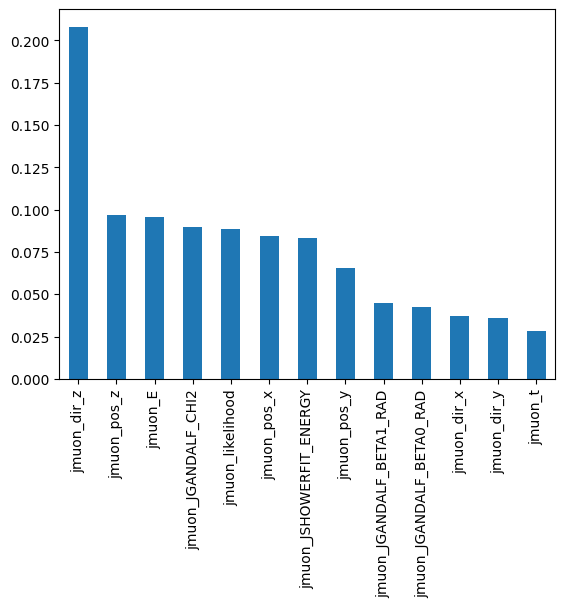

In [240]:
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [252]:
# param_dist = {
#     'n_estimators': [10, 50, 100, 200],
#     'criterion': ['gini', 'entropy', 'log_loss'],  # Kryterium podziału
#     'max_depth': [3, 5, 10, 20, None],  # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 5, 10],  # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],  # Minimalna liczba próbek wymagana do utworzenia liścia
#     'max_features': ['auto', 'sqrt', 'log2', None],  # Maksymalna liczba cech branych pod uwagę przy podziale węzła
#     'bootstrap': [True, False]  # Czy używać bootstrapa podczas budowy drzew
# }

# rf = RandomForestClassifier()

# # Use random search to find the best hyperparameters
# rand_search = RandomizedSearchCV(rf, 
#                                  param_distributions = param_dist, 
#                                  n_iter=5, 
#                                  cv=2)

# # Fit the random search object to the data
# rand_search.fit(X_train, y_train)

In [242]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [243]:
# y_pred = best_rf.predict(X_test)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [244]:
# print(len(best_rf.estimators_))

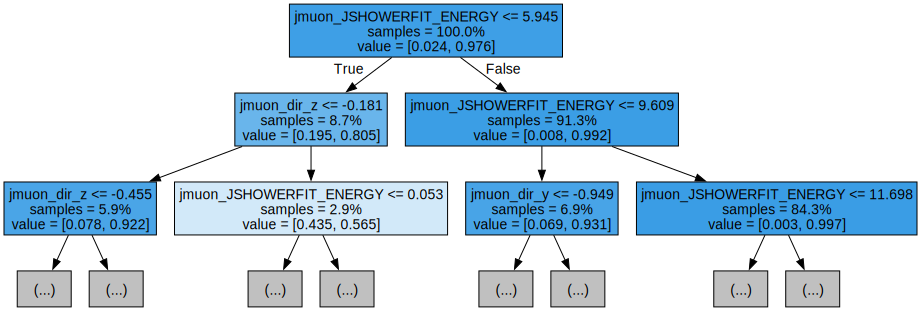

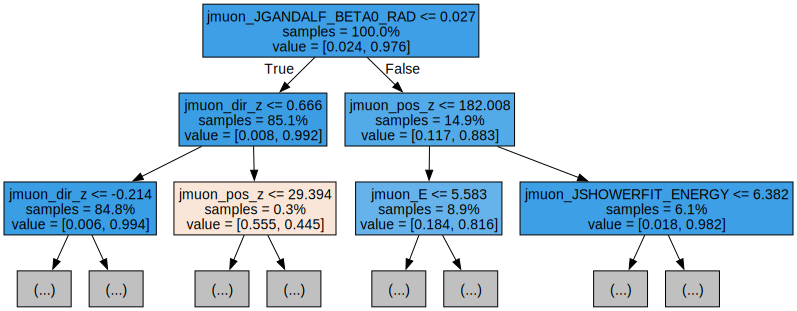

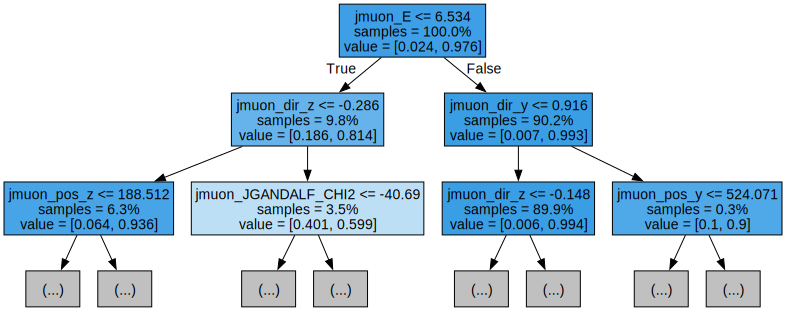

In [245]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)